Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score,classification_report,plot_roc_curve

from scipy.stats import zscore
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE



In [2]:
from imblearn.pipeline import Pipeline, make_pipeline

In [3]:
#df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [4]:
#df.to_csv("Telecom_customer_churn.csv")

In [5]:
df=pd.read_csv("Telecom_customer_churn.csv",index_col="Unnamed: 0")

In [6]:
pd.set_option('display.max_columns',2)
df.head()

,customerID,...,Churn
0,7590-VHVEG,...,No
1,5575-GNVDE,...,No
2,3668-QPYBK,...,Yes
3,7795-CFOCW,...,No
4,9237-HQITU,...,Yes


In [7]:
pd.set_option('display.max_columns',None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data compises of Services — which services the customer subscribed to (internet, phone, cable, etc.), Monthly bill total, Tenure — How long they had been a customer, Basic demographic info — whether they were elderly, had dependents, etc.

we want to predict whether  churn is Yes or No.
So this is a classification algorithm

In [8]:
df.shape

(7043, 21)

(7043, 21) is the size of the dataset

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


'customerID' is a string column,

'gender', 'SeniorCitizen', 'Partner', 'Dependents' ,'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'  are categorical columns

tenure,  'MonthlyCharges', 'TotalCharges' are  numeric column

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no missing data in any of the features

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## EDA

In [13]:
#Removing customer IDs from the data set the columns not used in the predictive model.
df.drop("customerID", axis=1,inplace=True)

In [14]:
#df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
sorted(df['TotalCharges'])[0:20]

[' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '100.2',
 '100.25',
 '100.35',
 '100.4',
 '100.8',
 '100.9',
 '1001.2',
 '1001.5',
 '1003.05']

In [15]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.MonthlyCharges = pd.to_numeric(df.MonthlyCharges, errors='coerce')
df.tenure = pd.to_numeric(df.tenure, errors='coerce')

df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 records with  missing values for Total charges\
as the number of missing values is less dropping the records

In [16]:
df.dropna(inplace = True)

<AxesSubplot:xlabel='Churn', ylabel='count'>

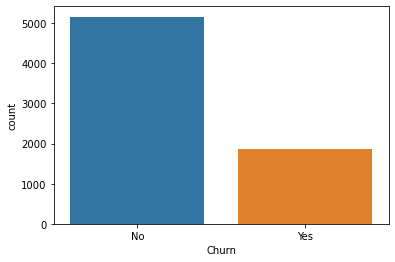

In [17]:
sns.countplot(df['Churn'])

As the classes are imbalanced look at F1 score rather than accuracy

In [18]:
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

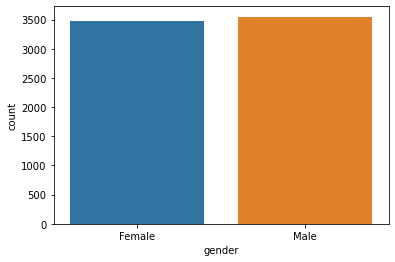

In [19]:
sns.countplot(df['gender'])

both female and male are in equal number

In [20]:
df.groupby('gender')['Churn'].value_counts()

gender  Churn
Female  No       2544
        Yes       939
Male    No       2619
        Yes       930
Name: Churn, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='Count'>

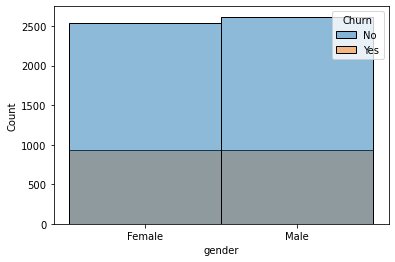

In [21]:
sns.histplot(x='gender',data=df,hue='Churn')

in both female and male the number of churn yes and no are similar

but churn = no are almost 3 times to churn = yes

In [22]:
df['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

number of youg customer are 5 times the senior citizens

In [23]:
df.groupby('SeniorCitizen')['Churn'].value_counts()

SeniorCitizen  Churn
0              No       4497
               Yes      1393
1              No        666
               Yes       476
Name: Churn, dtype: int64

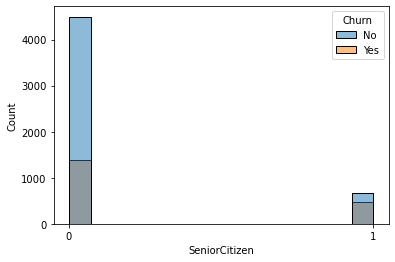

In [24]:
sns.histplot(x='SeniorCitizen',data=df,hue='Churn')
plt.xticks([0,1]);

IN young customer(3..) churn rate is more than senior citizen(1.02 times)

In [25]:
df['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

Number of customer with and without partner are almost same in number

In [26]:
df.groupby('Partner')['Churn'].value_counts()

Partner  Churn
No       No       2439
         Yes      1200
Yes      No       2724
         Yes       669
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Partner', ylabel='Count'>

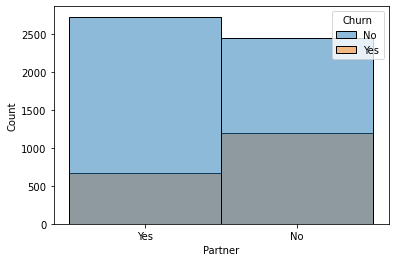

In [27]:
sns.histplot(x='Partner',data=df,hue='Churn')

in the customer without partner churn no is twice the churn yes
where as in customer with partner churn no is almost 4 times churn =yes

In [28]:
df['Dependents'].value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

customer without dependents are almost 2.5 times customer with dependents

In [29]:
df.groupby('Dependents')['Churn'].value_counts()

Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1773
            Yes       326
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='Count'>

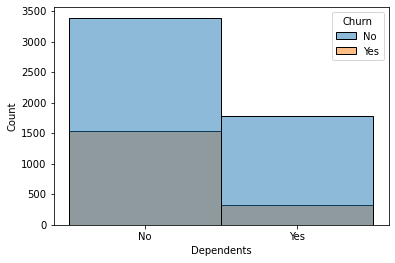

In [30]:
sns.histplot(x='Dependents',data=df,hue='Churn')

in the customer without Dependents churn no is a bit more than twice the churn yes
where as in customer with Dependents churn no is almost 6 times churn =yes

In [31]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

<AxesSubplot:xlabel='tenure', ylabel='Count'>

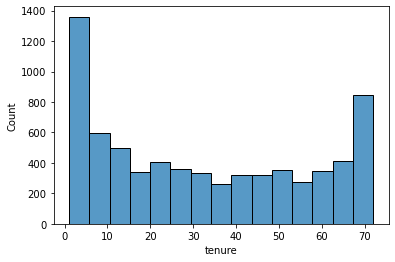

In [32]:
sns.histplot(x='tenure',data=df)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

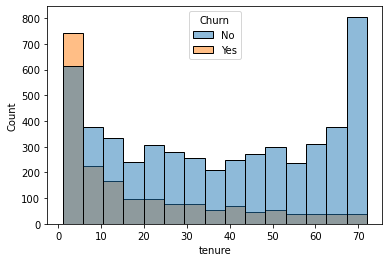

In [33]:
sns.histplot(x='tenure',data=df,hue='Churn')

it can be seen that for less than 15 years tenure churn rate is more, where as after 15 years customer tend to stay with the company and churn rate is less
and very less for 70 years

In [34]:
categoricalCols=['PhoneService', 
'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup',
'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
'Contract', 'PaperlessBilling', 'PaymentMethod']

PhoneService
Yes    6352
No      680
Name: PhoneService, dtype: int64
PhoneService  Churn
No            No        510
              Yes       170
Yes           No       4653
              Yes      1699
Name: Churn, dtype: int64


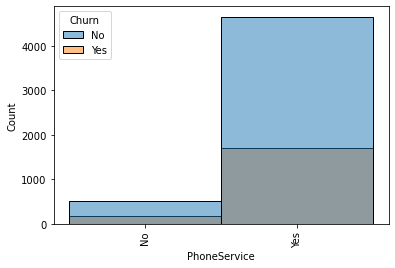

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
MultipleLines     Churn
No                No       2536
                  Yes       849
No phone service  No        510
                  Yes       170
Yes               No       2117
                  Yes       850
Name: Churn, dtype: int64


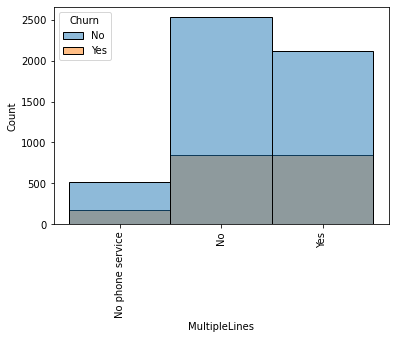

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
InternetService  Churn
DSL              No       1957
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1407
                 Yes       113
Name: Churn, dtype: int64


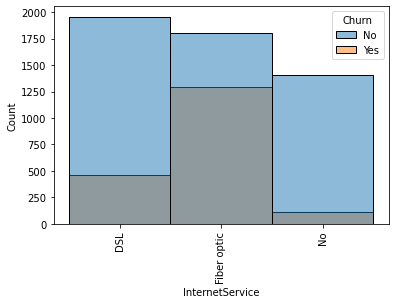

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
OnlineSecurity       Churn
No                   No       2036
                     Yes      1461
No internet service  No       1407
                     Yes       113
Yes                  No       1720
                     Yes       295
Name: Churn, dtype: int64


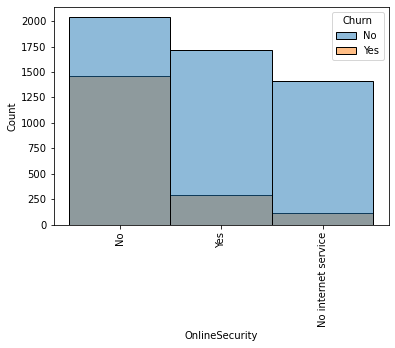

OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
OnlineBackup         Churn
No                   No       1854
                     Yes      1233
No internet service  No       1407
                     Yes       113
Yes                  No       1902
                     Yes       523
Name: Churn, dtype: int64


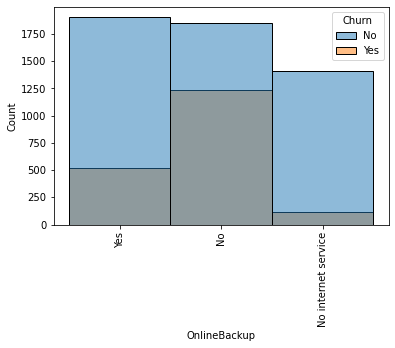

DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
DeviceProtection     Churn
No                   No       1883
                     Yes      1211
No internet service  No       1407
                     Yes       113
Yes                  No       1873
                     Yes       545
Name: Churn, dtype: int64


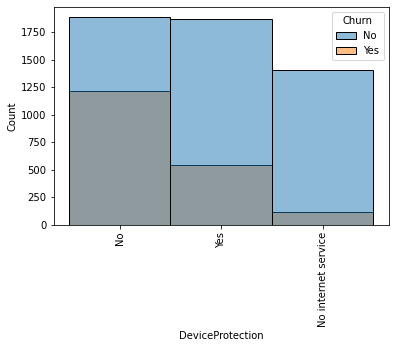

TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
TechSupport          Churn
No                   No       2026
                     Yes      1446
No internet service  No       1407
                     Yes       113
Yes                  No       1730
                     Yes       310
Name: Churn, dtype: int64


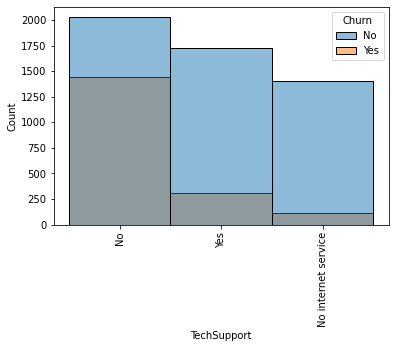

StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64
StreamingTV          Churn
No                   No       1867
                     Yes       942
No internet service  No       1407
                     Yes       113
Yes                  No       1889
                     Yes       814
Name: Churn, dtype: int64


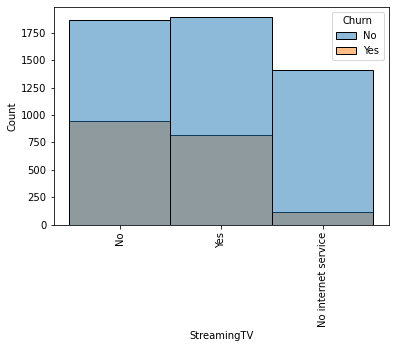

StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64
StreamingMovies      Churn
No                   No       1843
                     Yes       938
No internet service  No       1407
                     Yes       113
Yes                  No       1913
                     Yes       818
Name: Churn, dtype: int64


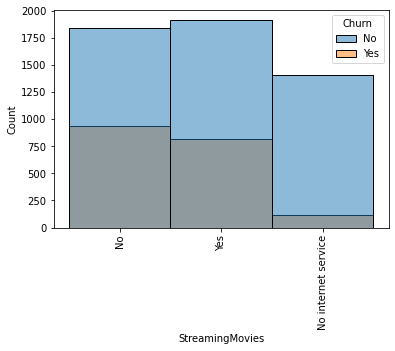

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64
Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1306
                Yes       166
Two year        No       1637
                Yes        48
Name: Churn, dtype: int64


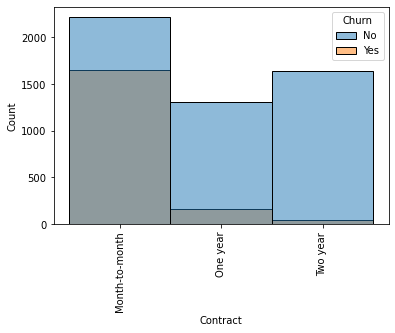

PaperlessBilling
Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64
PaperlessBilling  Churn
No                No       2395
                  Yes       469
Yes               No       2768
                  Yes      1400
Name: Churn, dtype: int64


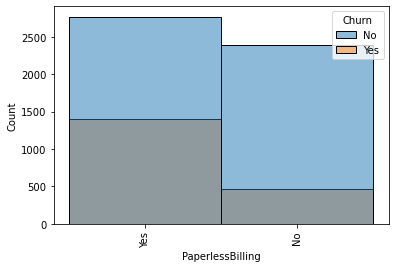

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64
PaymentMethod              Churn
Bank transfer (automatic)  No       1284
                           Yes       258
Credit card (automatic)    No       1289
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1296
                           Yes       308
Name: Churn, dtype: int64


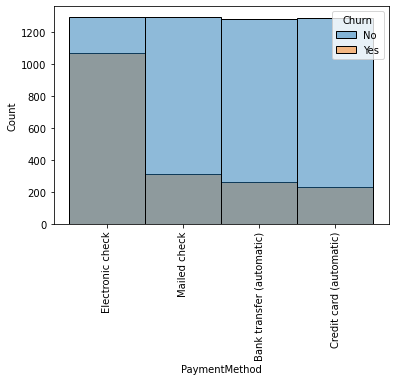

In [35]:
for col in categoricalCols:
    print(col)
    print(df[col].value_counts())
    print(df.groupby(col)['Churn'].value_counts())
    sns.histplot(x=col,data=df,hue='Churn')
    plt.xticks(rotation=90)
    plt.show()

Phone service is used by 6352 which is almost 10 times the customer not using phone
churn rate is more in customer  using phone service 26.7 %  is churn rate in using service
and churn rate is 25% in customer not using service

MultipleLines
____
MultipleLines are a bit more than having single lines by 400
in customer having multiple lines churn rate(850/(850+2117) is bit more than customer not having multiple lines(849/849+2536)

InternetService
___
More customers use Fiber Optic and most of the customers use internet service wwhich is 3 times the customers not having internet services
churn rate for DSL is 459/(459+1957) =18%
churn rate for Fiber Optic is 459/(459+1957) =41%

OnlineSecurity
___
Churn rate is more in customers not having online security

Online Bckup
___
Churn rate is more in customers not having online Backup
Device Protection
___
Churn rate is more in customers not having Device Protection
TechSupport
____
Churn rate is more in customers not having TechSupport
StreamingTV
___
Churn rate is more in customers not StreamingTV

StreamingMovies
___
Churn rate is more in customers not StreamingMovies

Contract
___
Churn rate is more in customers having month-month contract
       
PaperLess Billing
___
Churn rate is more in customers using paperlessBilling

paymentMethod
___
Churn rate is more in customers having Electronic Check and least for customers using Credit card



In [36]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

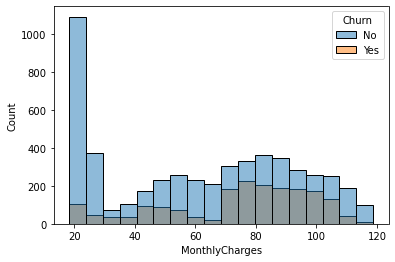

In [37]:
sns.histplot(x='MonthlyCharges',data=df,hue='Churn')

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

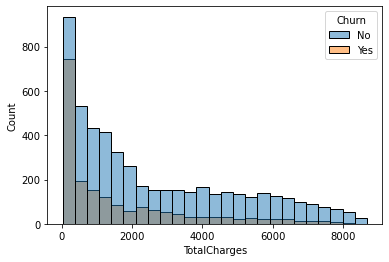

In [38]:
sns.histplot(x='TotalCharges',data=df,hue='Churn')

Customers having lower total charges have more churn rate thatn other having more total charges

In [39]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [40]:
df=pd.get_dummies(df)

In [41]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

In [42]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


Some features above are duplicate and dummies so will drop them


       'gender_Female', 'Partner_No',
       'Dependents_No', 'PhoneService_No',
        'MultipleLines_No','MultipleLines_No phone service',
        'InternetService_No',
        'OnlineSecurity_No','OnlineSecurity_No internet service',
        'OnlineBackup_No', 'OnlineBackup_No internet service',
        'DeviceProtection_No', 'DeviceProtection_No internet service', 
        'TechSupport_No', 'TechSupport_No internet service',
        'StreamingTV_No', 'StreamingTV_No internet service',
        'StreamingMovies_No', 'StreamingMovies_No internet service',
        'Contract_Month-to-month',
        'PaperlessBilling_No',
        'PaymentMethod_Bank transfer (automatic)',
        'Churn_No'

In [43]:
df.drop([ 'gender_Female', 'Partner_No',
       'Dependents_No', 'PhoneService_No',
        'MultipleLines_No','MultipleLines_No phone service',
        'InternetService_No',
        'OnlineSecurity_No','OnlineSecurity_No internet service',
        'OnlineBackup_No', 'OnlineBackup_No internet service',
        'DeviceProtection_No', 'DeviceProtection_No internet service', 
        'TechSupport_No', 'TechSupport_No internet service',
        'StreamingTV_No', 'StreamingTV_No internet service',
        'StreamingMovies_No', 'StreamingMovies_No internet service',
        'Contract_Month-to-month',
        'PaperlessBilling_No',
        'PaymentMethod_Bank transfer (automatic)',
        'Churn_No'],axis=1,inplace=True)

In [44]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1


In [46]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,-0.001819,0.016957,-0.210550,0.008392,0.142996,-0.108276,0.254923,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,0.005285,0.381912,0.163386,0.007877,0.332399,0.013786,0.017930,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,-0.013779,0.097825,-0.112343,0.248033,0.490912,-0.161368,0.787195,0.296447,0.441529,0.482607,0.338301,0.629668,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.000048,0.319072,0.064653,0.113008,0.469042,-0.052190,0.360769,0.412619,0.510100,0.522881,0.432868,0.515709,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708,-0.199484
gender_Male,-0.001819,0.005285,-0.013779,0.000048,1.000000,-0.001379,0.010349,-0.007515,-0.008883,0.007584,-0.011189,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199,-0.008545
Partner_Yes,0.016957,0.381912,0.097825,0.319072,-0.001379,1.000000,0.452269,0.018397,0.142561,-0.001043,0.001235,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948,-0.149982
Dependents_Yes,-0.210550,0.163386,-0.112343,0.064653,0.010349,0.452269,1.000000,-0.001078,-0.024307,0.051593,-0.164101,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448,-0.163128
PhoneService_Yes,0.008392,0.007877,0.248033,0.113008,-0.007515,0.018397,-0.001078,1.000000,0.279530,-0.452255,0.290183,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463,0.011691
MultipleLines_Yes,0.142996,0.332399,0.490912,0.469042,-0.008883,0.142561,-0.024307,0.279530,1.000000,-0.200318,0.366420,0.098592,0.202228,0.201733,0.100421,0.257804,0.259194,-0.003594,0.106618,0.163746,0.060319,0.083583,-0.227672,0.040033
InternetService_DSL,-0.108276,0.013786,-0.161368,-0.052190,0.007584,-0.001043,0.051593,-0.452255,-0.200318,1.000000,-0.641636,0.320343,0.156765,0.145150,0.312183,0.014973,0.025623,0.047300,0.030924,-0.063390,0.051222,-0.104293,0.042754,-0.124141


<AxesSubplot:>

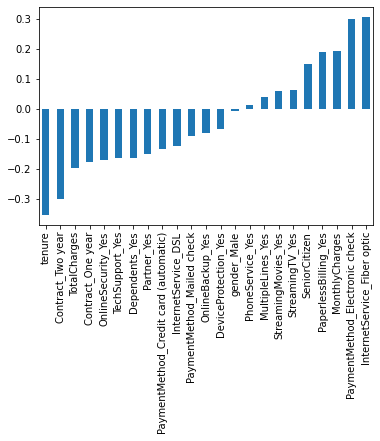

In [47]:
df.corr()['Churn_Yes'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

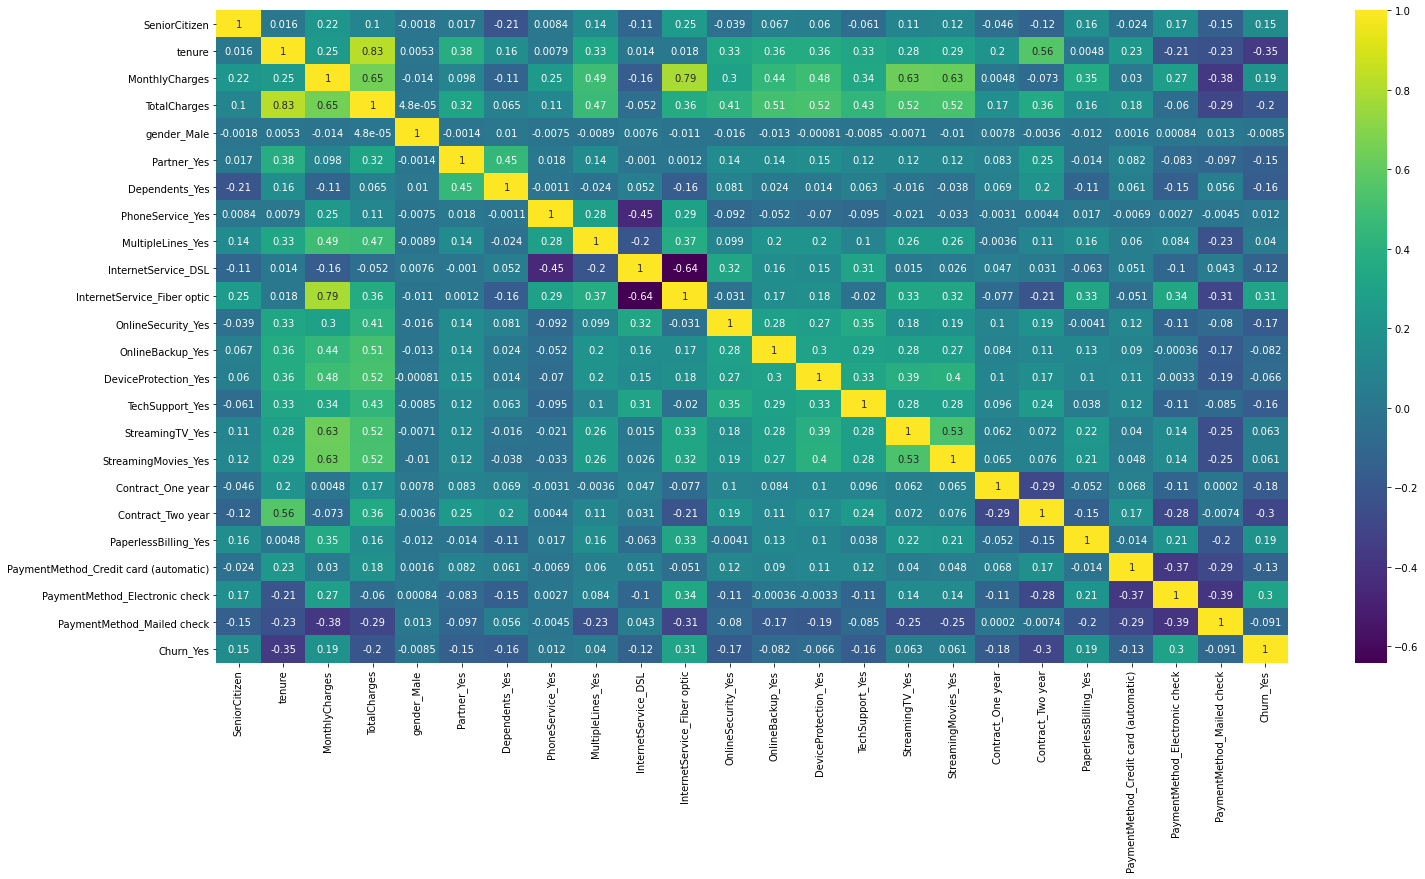

In [48]:
plt.figure(figsize=(24,12))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

splitting into X and y features

In [49]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [50]:
X=df.drop('Churn_Yes',axis=1)
y=df['Churn_Yes']

# Applying different machine learning models now

## identifying the best random state

In [52]:
max_accu=0
maxRS=0
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i,stratify=y)
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    pred=dt.predict(X_test)
    accurac=accuracy_score(y_test,pred)
    #print(accurac*100,"at random state",i)
    if(accurac>max_accu):
        max_accu=accurac
        maxRS=i
        
print("best accuracy is",max_accu,"on random state",maxRS)

best accuracy is 0.7535545023696683 on random state 25


best accuracy is 0.7535545023696683 on random state 25

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=25,stratify=y)

In [54]:
y_test.value_counts()

0    1704
1     617
Name: Churn_Yes, dtype: int64

In [55]:
y_train.value_counts()

0    3459
1    1252
Name: Churn_Yes, dtype: int64

**TASK: Scale the X train and X test data.**

oversampling the triaing set, after the split of data into training and validation set

In [56]:
smt=SMOTE()
X_resample,y_resample=smt.fit_resample(X_train,y_train)

In [57]:
y_resample.value_counts()

0    3459
1    3459
Name: Churn_Yes, dtype: int64

In [58]:
scaler = StandardScaler()

In [59]:
scaled_X_train = scaler.fit_transform(X_resample)
scaled_X_test = scaler.transform(X_test)

In [60]:
DTC=DecisionTreeClassifier()
DTC.fit(scaled_X_train,y_resample)
pred=DTC.predict(scaled_X_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1704
           1       0.48      0.55      0.51       617

    accuracy                           0.72      2321
   macro avg       0.65      0.67      0.66      2321
weighted avg       0.74      0.72      0.73      2321



In [61]:
RFC=RandomForestClassifier()
RFC.fit(scaled_X_train,y_resample)
pred=RFC.predict(scaled_X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1704
           1       0.58      0.61      0.59       617

    accuracy                           0.78      2321
   macro avg       0.72      0.72      0.72      2321
weighted avg       0.78      0.78      0.78      2321



In [62]:
svc=SVC()
svc.fit(scaled_X_train,y_resample)
pred=svc.predict(scaled_X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1704
           1       0.56      0.65      0.60       617

    accuracy                           0.77      2321
   macro avg       0.71      0.73      0.72      2321
weighted avg       0.78      0.77      0.78      2321



In [63]:
ada=AdaBoostClassifier()
ada.fit(scaled_X_train,y_resample)
pred=ada.predict(scaled_X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82      1704
           1       0.53      0.70      0.61       617

    accuracy                           0.76      2321
   macro avg       0.71      0.74      0.72      2321
weighted avg       0.79      0.76      0.77      2321



In [64]:
dtcAC=0.72
rfcAC=0.78
svcAC=0.77
adaAC=0.76

### now checking cross val score

In [65]:
imba_pipeline=make_pipeline(SMOTE(random_state=42),scaler,DTC)
DTCcv=cross_val_score(imba_pipeline,X_train,y_train,cv=5).mean()
DTCcv

0.7149196335497002

In [66]:
imba_pipeline=make_pipeline(SMOTE(random_state=42),scaler,RFC)
RFCcv=cross_val_score(imba_pipeline,X_train,y_train,cv=5).mean()
RFCcv

0.769900011932825

In [67]:
imba_pipeline=make_pipeline(SMOTE(random_state=42),scaler,svc)
svcCV=cross_val_score(imba_pipeline,X_train,y_train,cv=5).mean()
svcCV

0.7756322708616176

In [68]:
imba_pipeline=make_pipeline(SMOTE(random_state=42),scaler,ada)
adaCV=cross_val_score(imba_pipeline,X_train,y_train,cv=5).mean()
adaCV

0.757801028024127

In [69]:
print(dtcAC-DTCcv)
print(rfcAC-RFCcv)
print(svcAC-svcCV)
print(adaAC-adaCV) 

0.005080366450299745
0.010099988067175047
-0.00563227086161755
0.002198971975873043


DTC, SVC, ADA BOOST have almost same accuracy differences. and
from these 3 choosing Ada boost classifier as the  F1 score is good for both the outcomes.

## HyperParameterTuning

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
pipeLine=Pipeline([('smote',SMOTE(random_state=42)),('scaler',StandardScaler()),('ada',AdaBoostClassifier())])


In [73]:
help(AdaBoostClassifier)

Help on class AdaBoostClassifier in module sklearn.ensemble._weight_boosting:

class AdaBoostClassifier(sklearn.base.ClassifierMixin, BaseWeightBoosting)
 |  AdaBoostClassifier(base_estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
 |  
 |  An AdaBoost classifier.
 |  
 |  An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
 |  classifier on the original dataset and then fits additional copies of the
 |  classifier on the same dataset but where the weights of incorrectly
 |  classified instances are adjusted such that subsequent classifiers focus
 |  more on difficult cases.
 |  
 |  This class implements the algorithm known as AdaBoost-SAMME [2].
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  .. versionadded:: 0.14
 |  
 |  Parameters
 |  ----------
 |  base_estimator : object, default=None
 |      The base estimator from which the boosted ensemble is built.
 |      Support for sample weighting is requi

In [74]:
param_grid = {'ada__learning_rate':[0.01,0.1,1],'ada__algorithm':['SAMME','SAMME.R']}
grid = GridSearchCV(pipeLine,param_grid,verbose=2)

In [75]:
grid.fit(X_train,y_train,)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ......ada__algorithm=SAMME, ada__learning_rate=0.01; total time=   0.5s
[CV] END ......ada__algorithm=SAMME, ada__learning_rate=0.01; total time=   0.5s
[CV] END ......ada__algorithm=SAMME, ada__learning_rate=0.01; total time=   0.5s
[CV] END ......ada__algorithm=SAMME, ada__learning_rate=0.01; total time=   0.5s
[CV] END ......ada__algorithm=SAMME, ada__learning_rate=0.01; total time=   0.4s
[CV] END .......ada__algorithm=SAMME, ada__learning_rate=0.1; total time=   0.5s
[CV] END .......ada__algorithm=SAMME, ada__learning_rate=0.1; total time=   0.5s
[CV] END .......ada__algorithm=SAMME, ada__learning_rate=0.1; total time=   0.5s
[CV] END .......ada__algorithm=SAMME, ada__learning_rate=0.1; total time=   0.5s
[CV] END .......ada__algorithm=SAMME, ada__learning_rate=0.1; total time=   0.5s
[CV] END .........ada__algorithm=SAMME, ada__learning_rate=1; total time=   0.4s
[CV] END .........ada__algorithm=SAMME, ada__lear

GridSearchCV(estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('scaler', StandardScaler()),
                                       ('ada', AdaBoostClassifier())]),
             param_grid={'ada__algorithm': ['SAMME', 'SAMME.R'],
                         'ada__learning_rate': [0.01, 0.1, 1]},
             verbose=2)

In [76]:
grid.best_params_

{'ada__algorithm': 'SAMME.R', 'ada__learning_rate': 1}

In [77]:
grid.best_estimator_

Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('ada', AdaBoostClassifier(learning_rate=1))])

In [78]:
pd.DataFrame(data=grid.cv_results_,columns=grid.cv_results_.keys())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ada__algorithm,param_ada__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.580811,0.031177,0.015967,0.000834,SAMME,0.01,"{'ada__algorithm': 'SAMME', 'ada__learning_rat...",0.492047,0.490446,0.493631,0.488323,0.493631,0.491615,0.002026,6
1,0.567845,0.019762,0.025587,0.006990,SAMME,0.1,"{'ada__algorithm': 'SAMME', 'ada__learning_rat...",0.621421,0.596603,0.607219,0.615711,0.591295,0.606450,0.011288,5
2,0.557569,0.026409,0.018756,0.006241,SAMME,1,"{'ada__algorithm': 'SAMME', 'ada__learning_rat...",0.760339,0.745223,0.757962,0.754777,0.763270,0.756314,0.006208,2
3,0.599086,0.050926,0.031461,0.005277,SAMME.R,0.01,"{'ada__algorithm': 'SAMME.R', 'ada__learning_r...",0.654295,0.644374,0.661359,0.663482,0.658174,0.656337,0.006737,4
4,0.612139,0.063704,0.028149,0.015342,SAMME.R,0.1,"{'ada__algorithm': 'SAMME.R', 'ada__learning_r...",0.735949,0.725053,0.726115,0.747346,0.751592,0.737211,0.010790,3
5,0.627989,0.015377,0.032732,0.001808,SAMME.R,1,"{'ada__algorithm': 'SAMME.R', 'ada__learning_r...",0.757158,0.751592,0.754777,0.764331,0.761146,0.757801,0.004515,1


### Displaying the confusion matrix and classification report

In [79]:
from sklearn.metrics import confusion_matrix,classification_report

In [80]:
grid_pred = grid.predict(X_test)

In [81]:
confusion_matrix(y_test,grid_pred)

array([[1317,  387],
       [ 179,  438]], dtype=int64)

In [82]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1704
           1       0.53      0.71      0.61       617

    accuracy                           0.76      2321
   macro avg       0.71      0.74      0.72      2321
weighted avg       0.79      0.76      0.77      2321



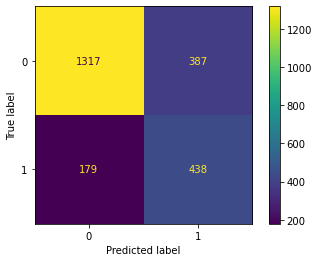

In [83]:
plot_confusion_matrix(grid,X_test,y_test)

f1 score for churn = no is 0.82 which is good and it is almost predicting 1317/(387+1317) negative samples correctly and predictign 387 outof 387+1317 wrong.
but for churn=yes f1 score =0.61 which is a bit less and it is predicintg 438 outof (438+179) samples correctly and predicitng 
remaining 179 samples wrong.

## Training with best params

In [84]:
grid.best_params_

{'ada__algorithm': 'SAMME.R', 'ada__learning_rate': 1}

In [86]:
pipeLine=Pipeline([('smote',SMOTE(random_state=42)),('scaler',StandardScaler()),('ada',AdaBoostClassifier(learning_rate=1,algorithm='SAMME.R'))])

param_grid = {'ada__learning_rate':[1],'ada__algorithm':['SAMME.R']}


In [87]:
Final_model=pipeLine
Final_model.fit(X_train,y_train)


Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('ada', AdaBoostClassifier(learning_rate=1))])

In [88]:

pred=Final_model.predict(X_test)
accuracyScore=accuracy_score(y_test,pred)
print(accuracyScore)

0.7561395950021542


final accuracy achieved is 75.6% with Ada Boost Classifier

In [89]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1704
           1       0.53      0.71      0.61       617

    accuracy                           0.76      2321
   macro avg       0.71      0.74      0.72      2321
weighted avg       0.79      0.76      0.77      2321



## plotting AUC ROC CURVE

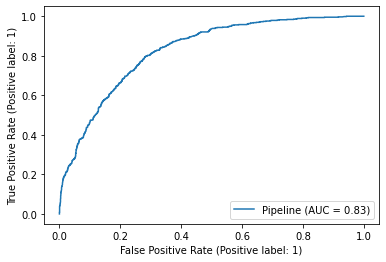

In [90]:
plot_roc_curve(Final_model,X_test,y_test)

AUC-ROC Curve area is 0.83 which is good.

## saving the model


In [91]:
import joblib
joblib.dump(Final_model,"Customer_Churn_Analysis_Classification.pkl")

['Customer_Churn_Analysis_Classification.pkl']